At the end of the experiment, you will be able to:
            
*   Visualize the high-dimensional data (3D) to low-dimensional data (2D) by applying Isomap algorithm 
*    Understand how introduction of noise into data effects the lower-dimensional representation of data




## Domain Information

Swiss Roll is a curled surface, where the distance between the points along the surface of the roll and direct distance is different.

If we just projected a 2D plane onto a 3D space it would simply squash the various layers together and lose all the information like geometry and similarity between points. we wanted to capture. Instead, what we want is to unroll the Swiss roll, to obtain a 2D data set,  without much loss of information. This approach is Manifold Learning.


Manifold Learning is when we bend and twist a high-dimensional space such that it can be mapped to a lower-dimensional space. It ensures that the optimal manifold is found by reducing the dimensionality of our data set.



In this experiment, swiss roll data is high-dimensional dataset which is difficult to visualize. To aid visualization of the structure of the dataset, the dimension must be reduced in some way. One of the approaches to manifold learning, Isomap performs dimensionality reduction by seeking lower dimensional embedding in data. Isomap maintains the geodesic distances between the points. This problem is unsupervised: it learns the non-linear structure in the data from the swiss roll data itself. 

In [ ]:
### Import the required packages
from sklearn.datasets import *
### Manifold is imported to access swiss roll dataset and the dimensionality reduction approach: Isomap
from sklearn import manifold
import matplotlib.pyplot as plt

### Generating the swiss roll data

In [ ]:
### Specify the number of data samples from swiss roll
n_samples = 1500
''''we use make_swiss_roll method which takes the number of data samples and 
returns the 3D coordinates of those data samples with the colors projected onto each sample
input is 1500 samples and output will be 1500 X 3'''
X, color = make_swiss_roll(n_samples)

**Lets examine the shape of 'X' and 'color': You'll see here below that we are simply labelling each of the points along the swiss roll with a particular color. Note however that we are not labelling here for classification purposes. We are just labelling to be able to plot the swiss roll with different points representing different sets of colors. **

In [ ]:
X.shape,color.shape

((1500, 3), (1500,))

####  Now reduce the dimensions of data from higher to lower

In [ ]:
'''we use Isomap technique from manifold which takes as input 
 number of neighbors to be considered for each point calculated using a nearest neighbor search algorithm 
 in the swiss roll data and the manifold dimensions that the swiss roll data has to be transformed to'''
### We create an object of Isomap class
### 3d, we are choosing the next best i.e. 2D i.e. 2 components here.
iso = manifold.Isomap(n_neighbors=6, n_components=2)

### We are fitting the data to Isomap by getting distance along the manifold 
iso.fit(X)

### We will transform the data
manifold_data = iso.transform(X)

In [ ]:
manifold_data.shape

(1500, 2)

### Visualization

#### Let us plot the data. In this we are going to see two plots, first plot represents swiss roll data and the second plot represents the reduced  data (reduced by Isomap)

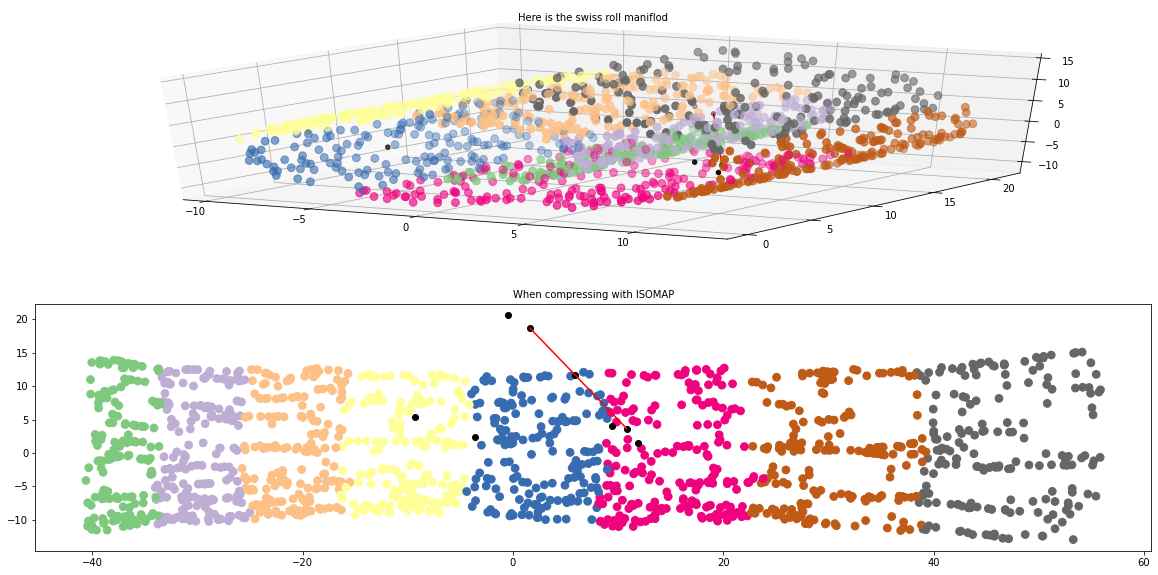

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod', fontsize=10)
ax.scatter(X[:,0],X[:,1],X[:,2],c = color,cmap="Accent",s=60)
x = X[:,0][2:10] 
y = X[:,1][2:10] # Just as abovve, this time for column 1
ax.scatter(x,y,c = "black") #Now we randomly plot this in both 3D manifold (this may not be clearly visible as the  existing
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 

#Now we plot 2D after ISOMAP...
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = color,cmap="Accent",s=60)
x = X[:,0][2:10]#Now we plot the same 'black' samples, after ISOMAP in 2D and observe the distance in 2D.
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

#### Experiment with different values of n_neighbors to be passed to Isomap (Read about n_neighbors in previous cell comments.)

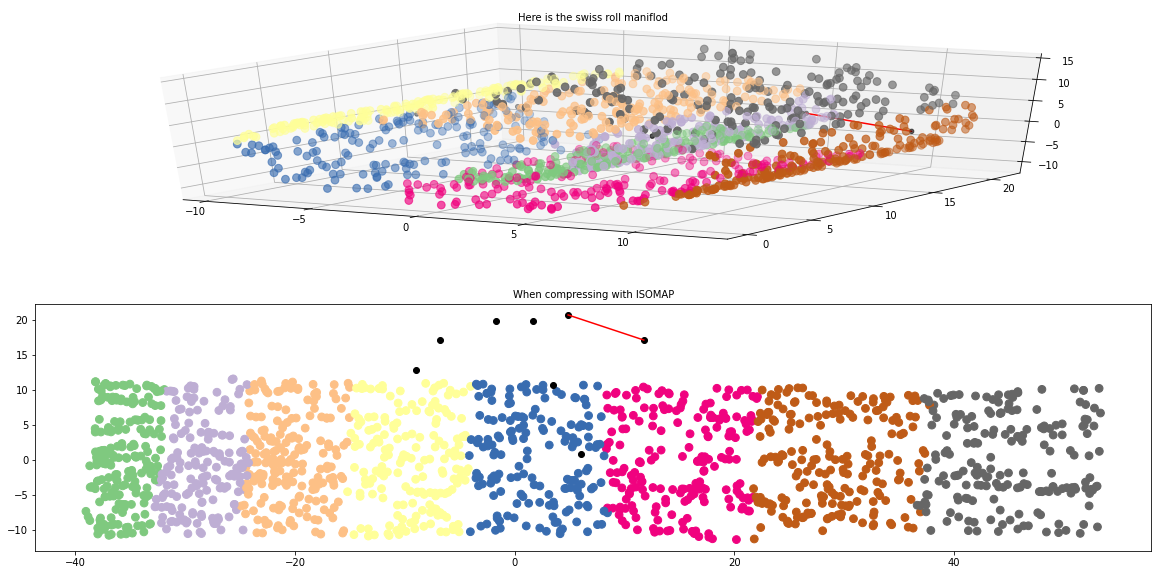

In [ ]:
n_samples = 1500
X, color = make_swiss_roll(n_samples)

iso = manifold.Isomap(n_neighbors=10, n_components=2)
iso.fit(X)
manifold_data = iso.transform(X)

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod', fontsize=10)
ax.scatter(X[:,0],X[:,1],X[:,2],c = color,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = color,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

#### Now let us generate swiss roll data for 300 samples with some noise in it. 

NOTE: Noise here below has two components. I.e. number of samples  and variance (i.e. the 'noise' variable you see below). The idea here is, you can only 10 samples, but they can contain a huge variance i.e. one noisy point can be in a 3d locaion (2,3,2) and other noisy point can be in a 3d location (40,80,100). As you can see the range of noise is high in the example just quoted. However if variance is low, the 3d point locations will be closer (and hence, as you might guess, the noise is less likely to disrupt the Manifold)


In [ ]:
''' make_swiss_roll allows you to pass range of noisy samples along with n_samples 
where the range of noise affects the variance around data samples'''
noise = 0.01*200 
n_samples = 300
ndata,colors = make_swiss_roll(n_samples,noise)

#### Lets concatenate the noise data values and original data values

In [ ]:
import numpy as np
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)

In [ ]:
'''con_data has 300 additional samples that have been generated by make_swiss_roll with noise'''
### We create an object of Isomap class
iso = manifold.Isomap(n_neighbors=6, n_components=2)
### We are fitting the noisy data to Isomap by getting distance along the manifold
iso.fit(con_data)
### We will transform the data
manifold_data = iso.transform(con_data)

#### Let us plot the data

#### Let us plot the data. In this we are going to see two plots, first plot represents noisy swiss roll data with noise and the second plot represents the reduced noisy data (reduced by Isomap)

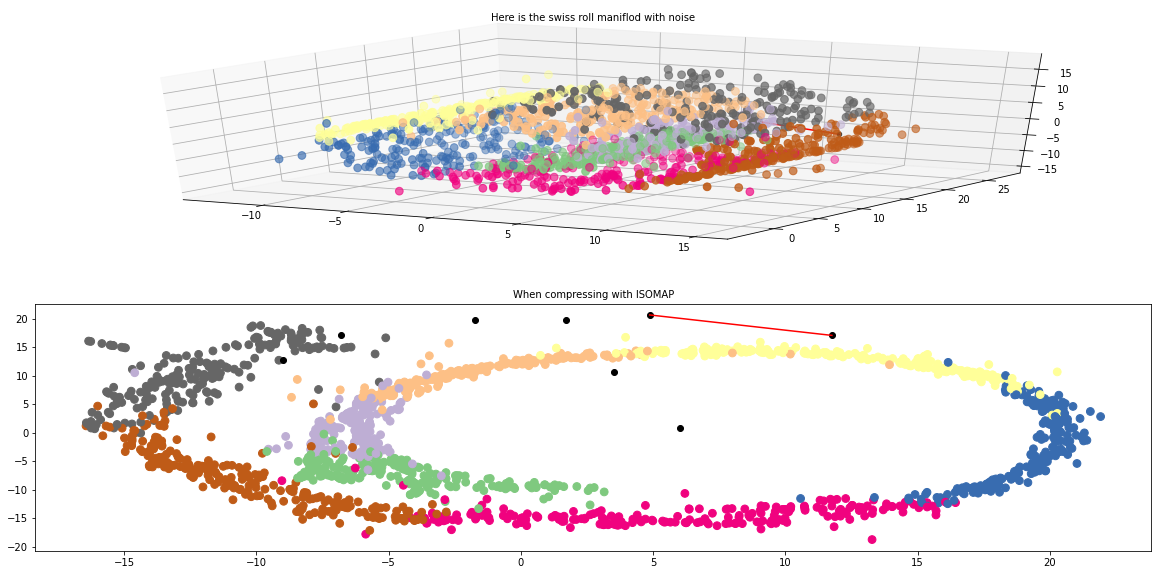

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

#### Vary the range of noise i.e variance in the data 
noise = 0.01*50 


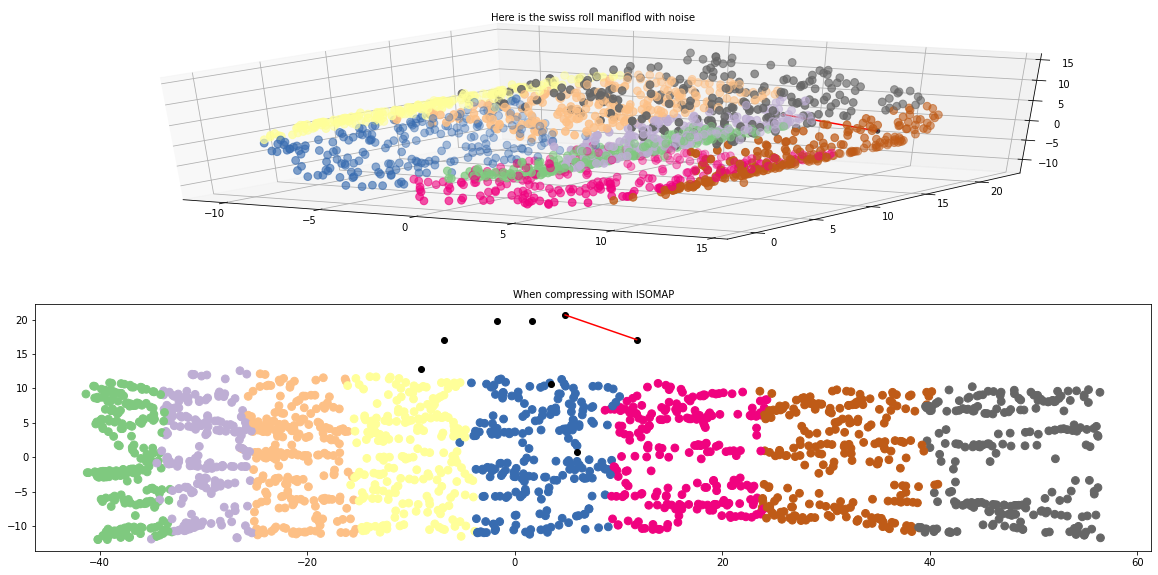

In [ ]:
### Tweak noise i.e the variance around data samples to visualize the representation
noise = 0.01*50 
n_samples = 300
ndata,colors = make_swiss_roll(n_samples,noise)
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(con_data)
manifold_data = iso.transform(con_data)


from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

**As you can see above, when the variance of noise is reduced, the 2D representation of Manifold looks fine. The rest of the experiments with varying the values, is merely for the sake of trying things out, and always noticing that ISOMAP is very sensitive to Noise, which other techniques such as TSne will deal with better. You can see that in other experiment**

####  Vary the range of noise i.e variance in the data 
noise = 0.01*100


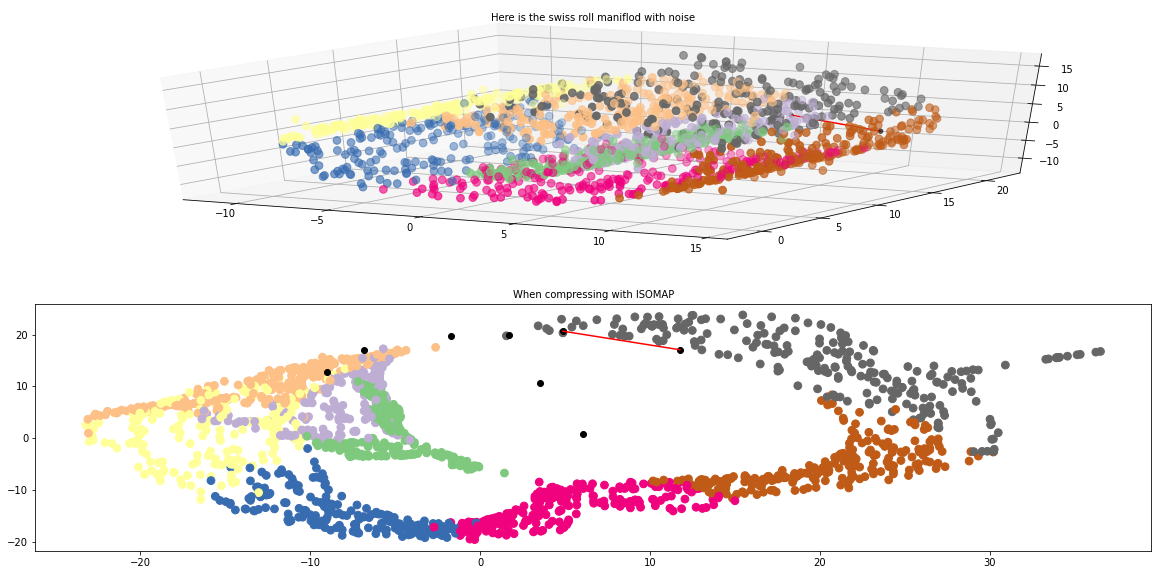

In [ ]:
### Tweak noise i.e the variance around data samples to visualize the representation
noise = 0.01*100 
n_samples = 300
ndata,colors = make_swiss_roll(n_samples,noise)
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(con_data)
manifold_data = iso.transform(con_data)

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

####  Vary the range of noise i.e variance in the data 
noise = 0.01*200


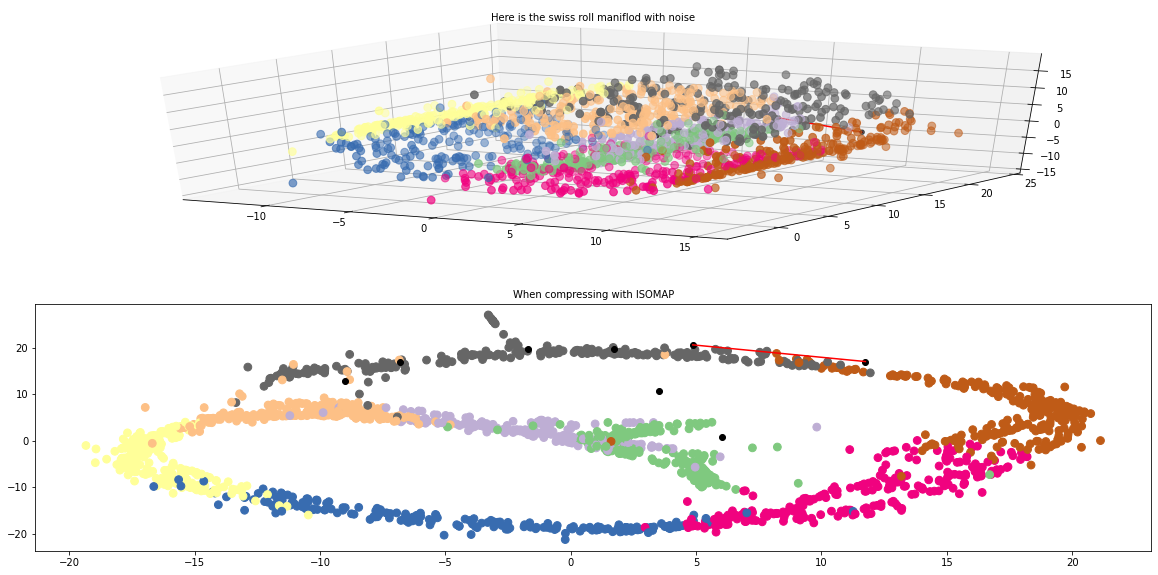

In [ ]:
### Tweak noise i.e the variance around data samples to visualize the representation
noise = 0.01*200 
n_samples = 300
ndata,colors = make_swiss_roll(n_samples,noise)
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(con_data)
manifold_data = iso.transform(con_data)

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

#### Vary the number of samples of data with noise and plot the data
n = 10

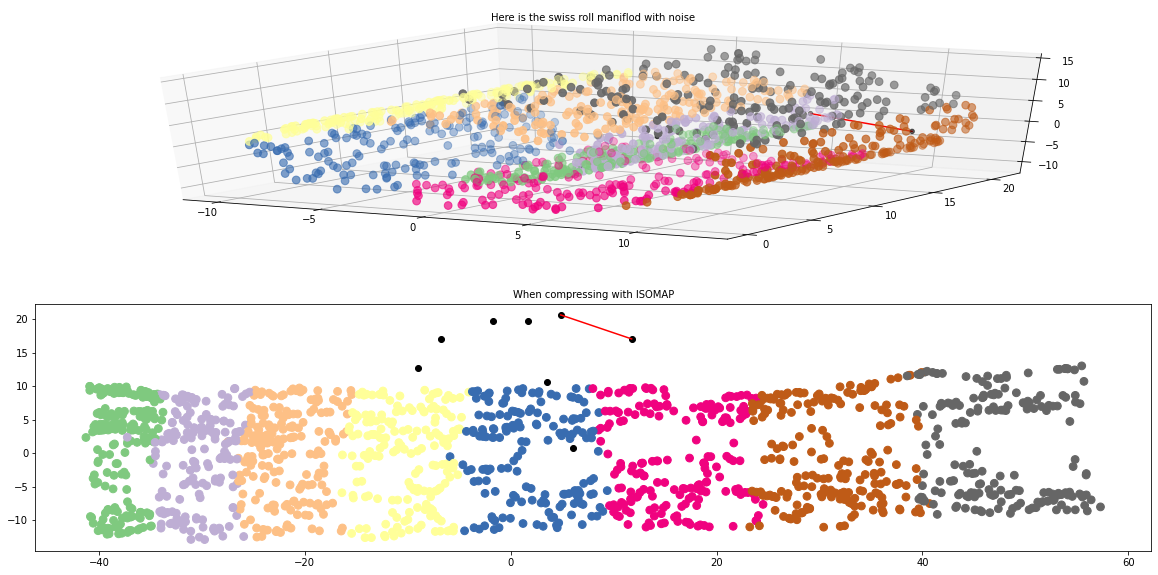

In [ ]:
noise = 0.01*200 
n_samples = 10
ndata,colors = make_swiss_roll(n_samples,noise)
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(con_data)
manifold_data = iso.transform(con_data)

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

#### Varying the number of samples of data with noise and plot the data
n = 20

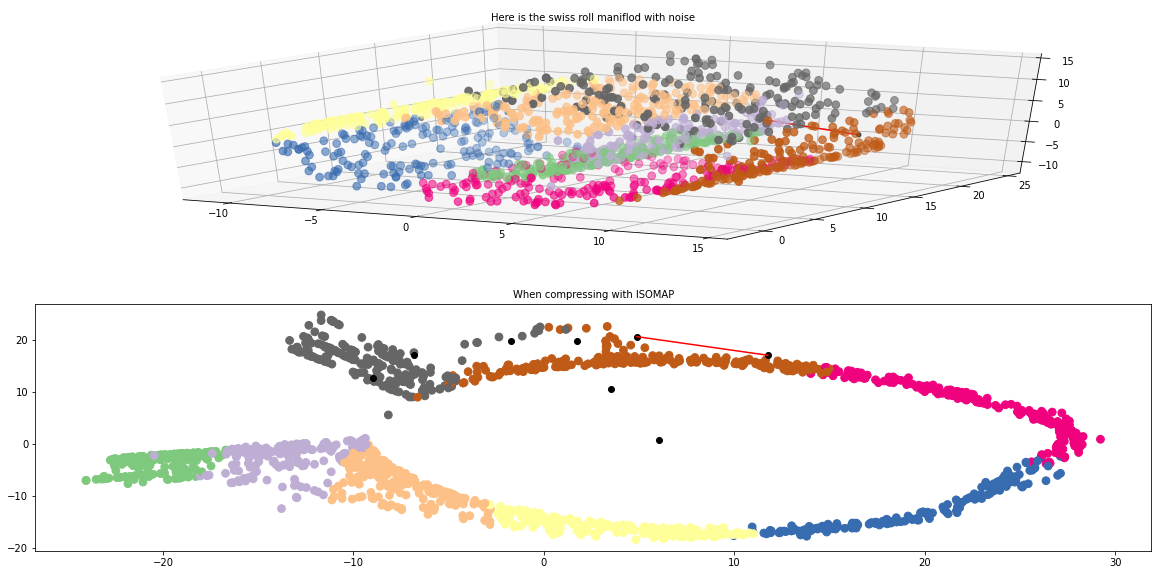

In [ ]:
noise = 0.01*200 
n_samples = 20
ndata,colors = make_swiss_roll(n_samples,noise)
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(con_data)
manifold_data = iso.transform(con_data)

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

#### Varying the number of samples of data with noise and plot the data
n = 30

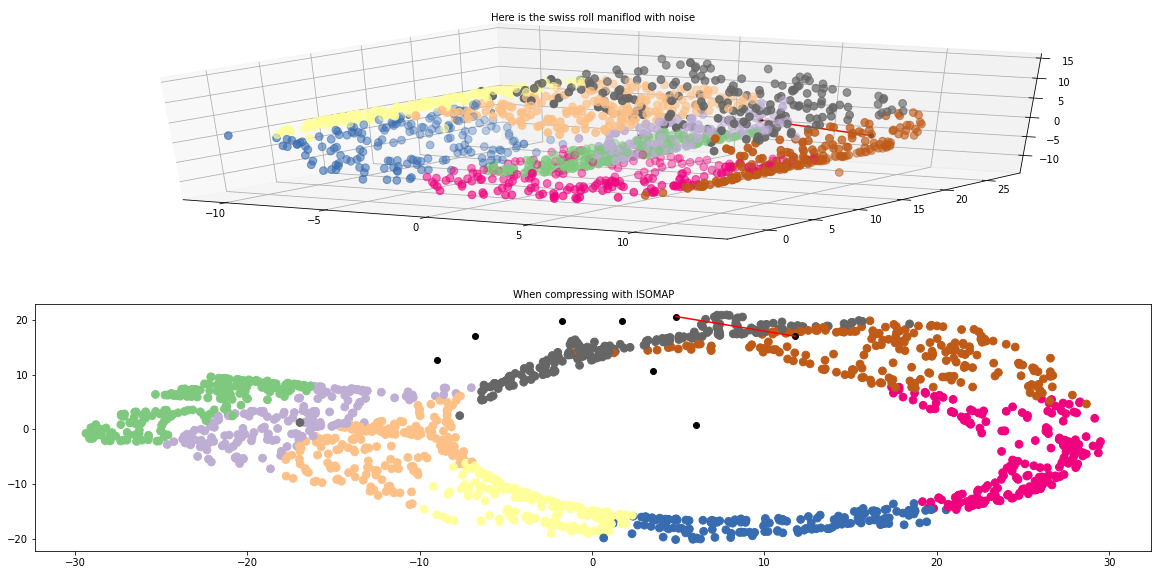

In [ ]:
noise = 0.01*200 
n_samples = 30
ndata,colors = make_swiss_roll(n_samples,noise)
con_data =  np.concatenate((X, ndata), axis=0)
con_colors = np.concatenate((color,colors),axis=0)
iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(con_data)
manifold_data = iso.transform(con_data)

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod with noise', fontsize=10)
ax.scatter(con_data[:,0],con_data[:,1],con_data[:,2],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_data[:,0],manifold_data[:,1],c = con_colors,cmap="Accent",s=60)
x = X[:,0][2:10]
y = X[:,1][2:10]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()